In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from factor_analyzer import FactorAnalyzer

#test hello!

In [105]:
df = pd.read_csv('./df_agg_57.csv')
df.shape

(57, 117)

In [106]:
df.head()

,storm,deaths,min_time,max_time,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,...,med_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost
0,Georges,16,1998-09-15,1998-10-01,63.60,0.0,1445.0,0.0,26.18,18.2,...,0.0,0.13,0.0,0.52,0.0,0.11,0.0,0.50,0.0,11191.0
1,Isidore,5,2002-09-14,2002-09-27,26.16,0.0,431.0,0.0,25.72,12.3,...,0.0,0.11,0.0,0.49,0.0,0.09,0.0,0.50,0.0,1943.5
2,Lili,2,2002-09-21,2002-10-04,3.77,0.0,77.0,0.0,26.40,21.6,...,0.0,0.06,0.0,0.51,0.0,0.05,0.0,0.44,0.0,1866.6
3,Ivan,57,2004-09-02,2004-09-24,35.21,-2.0,891.0,0.0,25.90,12.1,...,0.0,0.06,0.0,0.52,0.0,0.06,0.0,0.50,0.0,33005.8
4,Dorian,10,2019-08-24,2019-09-09,4.11,0.0,183.0,0.0,25.50,7.7,...,0.0,0.03,0.0,0.43,0.0,0.02,0.0,0.38,0.0,1915.9


In [107]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

missing_values, non_numeric_columns


(storm                             0
 deaths                            0
 min_time                          0
 max_time                          0
 avg_elevation                     0
                                  ..
 avg_soil_moisture_100_to_255cm    0
 min_soil_moisture_100_to_255cm    0
 max_soil_moisture_100_to_255cm    0
 med_soil_moisture_100_to_255cm    0
 target_cost                       0
 Length: 117, dtype: int64,
 Index(['storm', 'min_time', 'max_time'], dtype='object'))

In [108]:
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

# Convert 'min_time' and 'max_time' to datetime objects
df['min_time'] = pd.to_datetime(df['min_time'])
df['max_time'] = pd.to_datetime(df['max_time'])

# Calculate the duration of the storm
df['duration'] = (df['max_time'] - df['min_time']).dt.days

# Now we can drop 'min_time' and 'max_time' as they've been effectively replaced by 'duration'
df = df.drop(['min_time', 'max_time'], axis=1)

# For 'storm' we'll use one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
storm_encoded = encoder.fit_transform(df[['storm']])

# # Create a dfFrame from the one-hot encoded variables
# storm_encoded_df = pd.DataFrame(storm_encoded, columns=encoder.get_feature_names_out(['storm']))

# # Concatenate the original dfFrame and the one-hot encoded df
# df = pd.concat([df, storm_encoded_df], axis=1)

# Drop the original 'storm' column
df = df.drop('storm', axis=1)

# Return the first few rows of the transformed df
df.head()


c:\Users\PC\miniconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,deaths,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,max_temperature_2m,med_temperature_2m,avg_relativehumidity_2m,...,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost,duration
0,16,63.60,0.0,1445.0,0.0,26.18,18.2,29.4,26.8,88.17,...,0.13,0.0,0.52,0.0,0.11,0.0,0.50,0.0,11191.0,16
1,5,26.16,0.0,431.0,0.0,25.72,12.3,29.7,26.6,89.05,...,0.11,0.0,0.49,0.0,0.09,0.0,0.50,0.0,1943.5,13
2,2,3.77,0.0,77.0,0.0,26.40,21.6,31.8,26.5,86.52,...,0.06,0.0,0.51,0.0,0.05,0.0,0.44,0.0,1866.6,13
3,57,35.21,-2.0,891.0,0.0,25.90,12.1,29.7,26.7,85.13,...,0.06,0.0,0.52,0.0,0.06,0.0,0.50,0.0,33005.8,22
4,10,4.11,0.0,183.0,0.0,25.50,7.7,30.3,26.6,85.38,...,0.03,0.0,0.43,0.0,0.02,0.0,0.38,0.0,1915.9,16


In [109]:
df.columns.tolist()

['deaths',
 'avg_elevation',
 'min_elevation',
 'max_elevation',
 'med_elevation',
 'avg_temperature_2m',
 'min_temperature_2m',
 'max_temperature_2m',
 'med_temperature_2m',
 'avg_relativehumidity_2m',
 'min_relativehumidity_2m',
 'max_relativehumidity_2m',
 'med_relativehumidity_2m',
 'avg_dewpoint_2m',
 'min_dewpoint_2m',
 'max_dewpoint_2m',
 'med_dewpoint_2m',
 'avg_apparent_temperature',
 'min_apparent_temperature',
 'max_apparent_temperature',
 'med_apparent_temperature',
 'avg_precipitation',
 'min_precipitation',
 'max_precipitation',
 'med_precipitation',
 'avg_rain',
 'min_rain',
 'max_rain',
 'med_rain',
 'avg_pressure_msl',
 'min_pressure_msl',
 'max_pressure_msl',
 'med_pressure_msl',
 'avg_surface_pressure',
 'min_surface_pressure',
 'max_surface_pressure',
 'med_surface_pressure',
 'avg_cloudcover',
 'min_cloudcover',
 'max_cloudcover',
 'med_cloudcover',
 'avg_cloudcover_low',
 'min_cloudcover_low',
 'max_cloudcover_low',
 'med_cloudcover_low',
 'avg_cloudcover_mid',
 '

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Columns: 115 entries, deaths to duration
dtypes: float64(99), int64(16)
memory usage: 51.3 KB


In [111]:
na_counts = df.isna().sum()
na_columns = na_counts[na_counts > 0]
na_columns


Series([], dtype: int64)

In [112]:
df.dtypes

deaths                              int64
avg_elevation                     float64
min_elevation                     float64
max_elevation                     float64
med_elevation                     float64
                                   ...   
min_soil_moisture_100_to_255cm    float64
max_soil_moisture_100_to_255cm    float64
med_soil_moisture_100_to_255cm    float64
target_cost                       float64
duration                            int64
Length: 115, dtype: object

In [113]:
df.describe()

,deaths,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,max_temperature_2m,med_temperature_2m,avg_relativehumidity_2m,...,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost,duration
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.0,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.000000
mean,120.526316,46.965263,-0.087719,494.070175,3.622807,24.975263,14.591228,29.936842,25.975439,87.584912,...,0.106491,0.0,0.467193,0.048596,0.110175,0.0,0.443684,0.055439,23822.617544,11.017544
std,454.648887,56.244622,0.391002,391.318735,15.434852,1.504039,5.665443,1.690586,1.257056,1.968414,...,0.058110,0.0,0.067817,0.094386,0.068178,0.0,0.082432,0.107870,39449.810013,4.429976
min,0.000000,0.810000,-2.000000,16.000000,0.000000,20.010000,0.200000,26.200000,20.000000,83.780000,...,0.010000,0.0,0.280000,0.000000,0.000000,0.0,0.170000,0.000000,1050.600000,2.000000
25%,7.000000,17.650000,0.000000,224.000000,0.000000,24.520000,10.700000,28.900000,25.900000,86.390000,...,0.070000,0.0,0.430000,0.000000,0.060000,0.0,0.440000,0.000000,2414.000000,7.000000
50%,27.000000,35.210000,0.000000,396.000000,0.000000,25.500000,14.600000,29.500000,26.300000,87.260000,...,0.100000,0.0,0.480000,0.000000,0.100000,0.0,0.460000,0.000000,8583.200000,11.000000
75%,55.000000,56.330000,0.000000,655.000000,0.000000,25.900000,19.100000,30.800000,26.600000,88.460000,...,0.140000,0.0,0.510000,0.000000,0.140000,0.0,0.470000,0.000000,27393.700000,14.000000
max,2981.000000,381.470000,0.000000,2081.000000,93.000000,26.890000,22.800000,34.900000,27.300000,93.380000,...,0.260000,0.0,0.720000,0.350000,0.330000,0.0,0.660000,0.360000,195046.100000,22.000000


Added Section to Scale numeric values prior to determining importance

In [114]:
from sklearn.preprocessing import StandardScaler

# Extract the target_cost column and drop it from the dataframe
target_cost = df['target_cost']
#df_without_target = df.drop(columns=['target_cost'])

# Scale the dataframe without the target_cost column
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

# Add the target_cost column back to the scaled dataframe
#df_scaled['target_cost'] = target_cost

df = df_scaled


In [115]:
df

,deaths,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,max_temperature_2m,med_temperature_2m,avg_relativehumidity_2m,...,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost,duration
0,-0.231949,0.298386,0.226339,2.451666,-0.236802,0.808121,0.642642,-0.320371,0.661777,0.299880,...,0.408154,0.0,0.785593,-0.519447,-0.002596,0.0,0.689248,-0.518507,-0.323041,1.134712
1,-0.256359,-0.373195,0.226339,-0.162606,-0.236802,0.499560,-0.408017,-0.141340,0.501261,0.750915,...,0.060918,0.0,0.339293,-0.519447,-0.298555,0.0,0.689248,-0.518507,-0.559536,0.451487
2,-0.263016,-0.774816,0.226339,-1.075281,-0.236802,0.955694,1.248106,1.111874,0.421003,-0.545809,...,-0.807169,0.0,0.636826,-0.519447,-0.890474,0.0,-0.045091,-0.518507,-0.561503,0.451487
3,-0.140968,-0.210860,-4.934198,1.023355,-0.236802,0.620301,-0.443632,-0.141340,0.581519,-1.258238,...,-0.807169,0.0,0.785593,-0.519447,-0.742494,0.0,0.689248,-0.518507,0.234851,2.501160
4,-0.245264,-0.768717,0.226339,-0.801994,-0.236802,0.351986,-1.227174,0.216721,0.501261,-1.130104,...,-1.328022,0.0,-0.553308,-0.519447,-1.334412,0.0,-0.779430,-0.518507,-0.560242,1.134712
5,-0.238606,0.200626,0.226339,1.025934,-0.236802,0.848369,0.891951,-0.201017,0.421003,-0.340794,...,-1.328022,0.0,-0.702075,-0.519447,-1.186433,0.0,-2.003327,-0.518507,-0.553861,-0.003995
6,-0.265235,-0.585037,0.226339,-0.946372,-0.236802,0.351986,-0.016246,1.469935,0.260487,-0.776452,...,-0.286317,0.0,-1.148375,-0.519447,-0.150576,0.0,0.077299,-0.518507,-0.574495,-0.231737
7,-0.132092,-0.308440,0.226339,1.023355,-0.236802,0.660548,0.428949,0.694136,0.260487,-0.981467,...,-0.633552,0.0,0.636826,-0.519447,-0.446535,0.0,0.566858,-0.518507,0.889141,0.223746
8,-0.160940,0.045467,0.226339,-0.252842,-0.236802,0.157458,-0.853211,-0.797785,0.421003,0.315256,...,-0.112699,0.0,0.636826,-0.519447,-0.298555,0.0,0.322078,-0.518507,-0.205736,1.134712
9,-0.189787,-0.774816,0.226339,-1.155204,-0.236802,0.700795,0.802912,-0.260694,0.380874,-0.714947,...,-0.633552,0.0,-0.850841,-0.519447,-0.594514,0.0,-1.024209,-0.518507,0.049526,-1.142703


In [116]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Drop the 'Unnamed: 0' column and other non-informative columns
#df = df.drop(columns=['Unnamed: 0'])

# Compute the correlation matrix
correlation_matrix_new = df.corr()

def remove_least_important_correlated_features(correlation_matrix, target_col, threshold=0.85):
    """
    Remove columns from the correlation matrix that have a correlation greater than the given threshold 
    while prioritizing the removal of features least correlated with the target.
    """
    # Drop the target column from the correlation matrix
    correlations_without_target = correlation_matrix.drop(index=target_col, columns=target_col)
    mask = abs(correlations_without_target) > threshold
    upper = mask.where(np.triu(np.ones(mask.shape), k=1).astype(bool))
    
    to_drop = set()
    for column in upper.columns:
        correlated_features = [index for index, value in enumerate(upper[column]) if value]
        correlated_feature_names = upper.index[correlated_features].tolist()
        correlations_with_target = abs(correlation_matrix[target_col][correlated_feature_names + [column]])
        least_correlated_with_target = correlations_with_target.idxmin()
        to_drop.add(least_correlated_with_target)
    return list(to_drop)

# Get the columns to drop based on high correlation prioritizing removal of least important ones
columns_to_drop_priority_new = remove_least_important_correlated_features(correlation_matrix_new, 'target_cost')
df_reduced_priority_new = df.drop(columns=columns_to_drop_priority_new)

# Remove the 'deaths' column from the features for the new dataset
X = df_reduced_priority_new.drop(columns=['target_cost', 'deaths'])
y = df_reduced_priority_new['target_cost']


## Feature importance exploration with Random Forest

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separate the features (X) from the target (y)
#X = df.drop('target_cost', axis=1)

# Remove features that are too highly correlated with each other
#X = X.drop(['avg_cloudcover','avg_dewpoint_2m','avg_cloudcover_mid','avg_elevation','max_windspeed_10m','min_soil_temperature_28_to_100cm','max_windgusts_10m','deaths','avg_cloudcover_low','med_soil_temperature_7_to_28cm','med_pressure_msl','min_surface_pressure'],axis=1)

#y = df['target_cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# exclude one-hot encoded storm features
non_storm_features = [col for col in X_train.columns if not col.startswith("storm_")]


# Sort the DataFrame by the importances
importances_sorted = importances_df.sort_values(by='importance', ascending=False)

# Return the top 10 important features
importances_sorted.head(10)


,feature,importance
61,max_windspeed_10m,0.083551
29,min_pressure_msl,0.072277
65,max_windspeed_100m,0.063419
28,avg_pressure_msl,0.061119
42,med_cloudcover_low,0.053732
39,avg_cloudcover_low,0.043579
87,avg_soil_temperature_28_to_100cm,0.030964
90,med_soil_temperature_28_to_100cm,0.028466
12,avg_dewpoint_2m,0.028188
47,avg_cloudcover_high,0.027157


### Feature Importance Bar Chart

C:\Users\PC\AppData\Local\Temp\ipykernel_38328\1948497945.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')


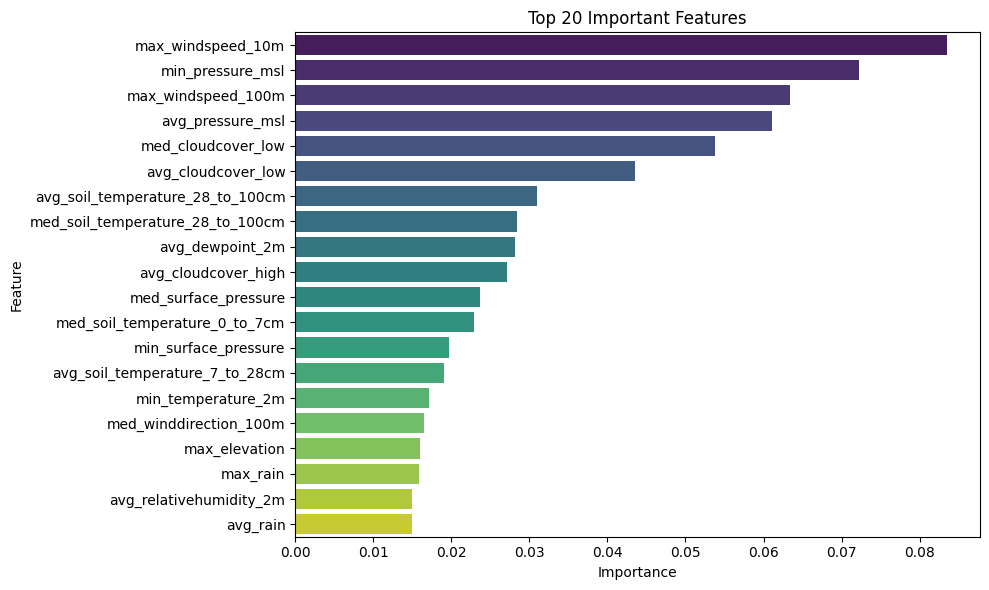

In [118]:
# a bar chart of the feature importances from the Random Forest model. showing top 20 important features.
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20

top_features = importances_sorted.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')

plt.title(f'Top {top_n} Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.tight_layout()
plt.show()


Creates list of features to check

In [119]:
feat = top_features['feature'].tolist()
feat.insert(0,'target_cost')


### Partial Dependence Plots

### Correlation Ranking

In [120]:
df[feat].corr()[['target_cost']]

,target_cost
target_cost,1.000000
max_windspeed_10m,0.310386
min_pressure_msl,-0.300144
max_windspeed_100m,0.316076
avg_pressure_msl,-0.244118
med_cloudcover_low,0.020027
avg_cloudcover_low,0.007509
avg_soil_temperature_28_to_100cm,0.135962
med_soil_temperature_28_to_100cm,0.139907
avg_dewpoint_2m,0.054663


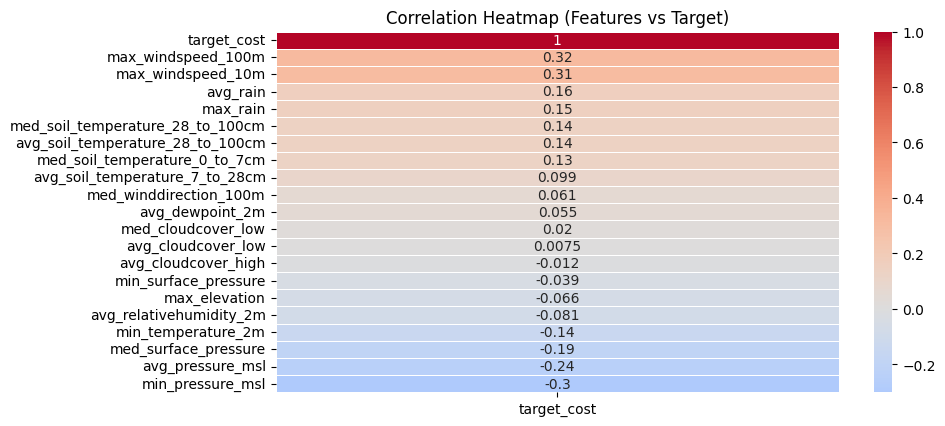

In [121]:
cell_height = 0.2  # You can adjust this as needed
fig_height = cell_height * df[feat].corr()[['target_cost']].shape[0]

fig, ax = plt.subplots(figsize=(10, fig_height))
sns.heatmap(df[feat].corr()[['target_cost']].sort_values(by='target_cost',ascending=False),
            annot=True,
            ax=ax,
            linewidths=.5,
            center=0,
            cmap="coolwarm"
            )

fig.tight_layout()
plt.title("Correlation Heatmap (Features vs Target)")
plt.show()

### Correlation Heatmap

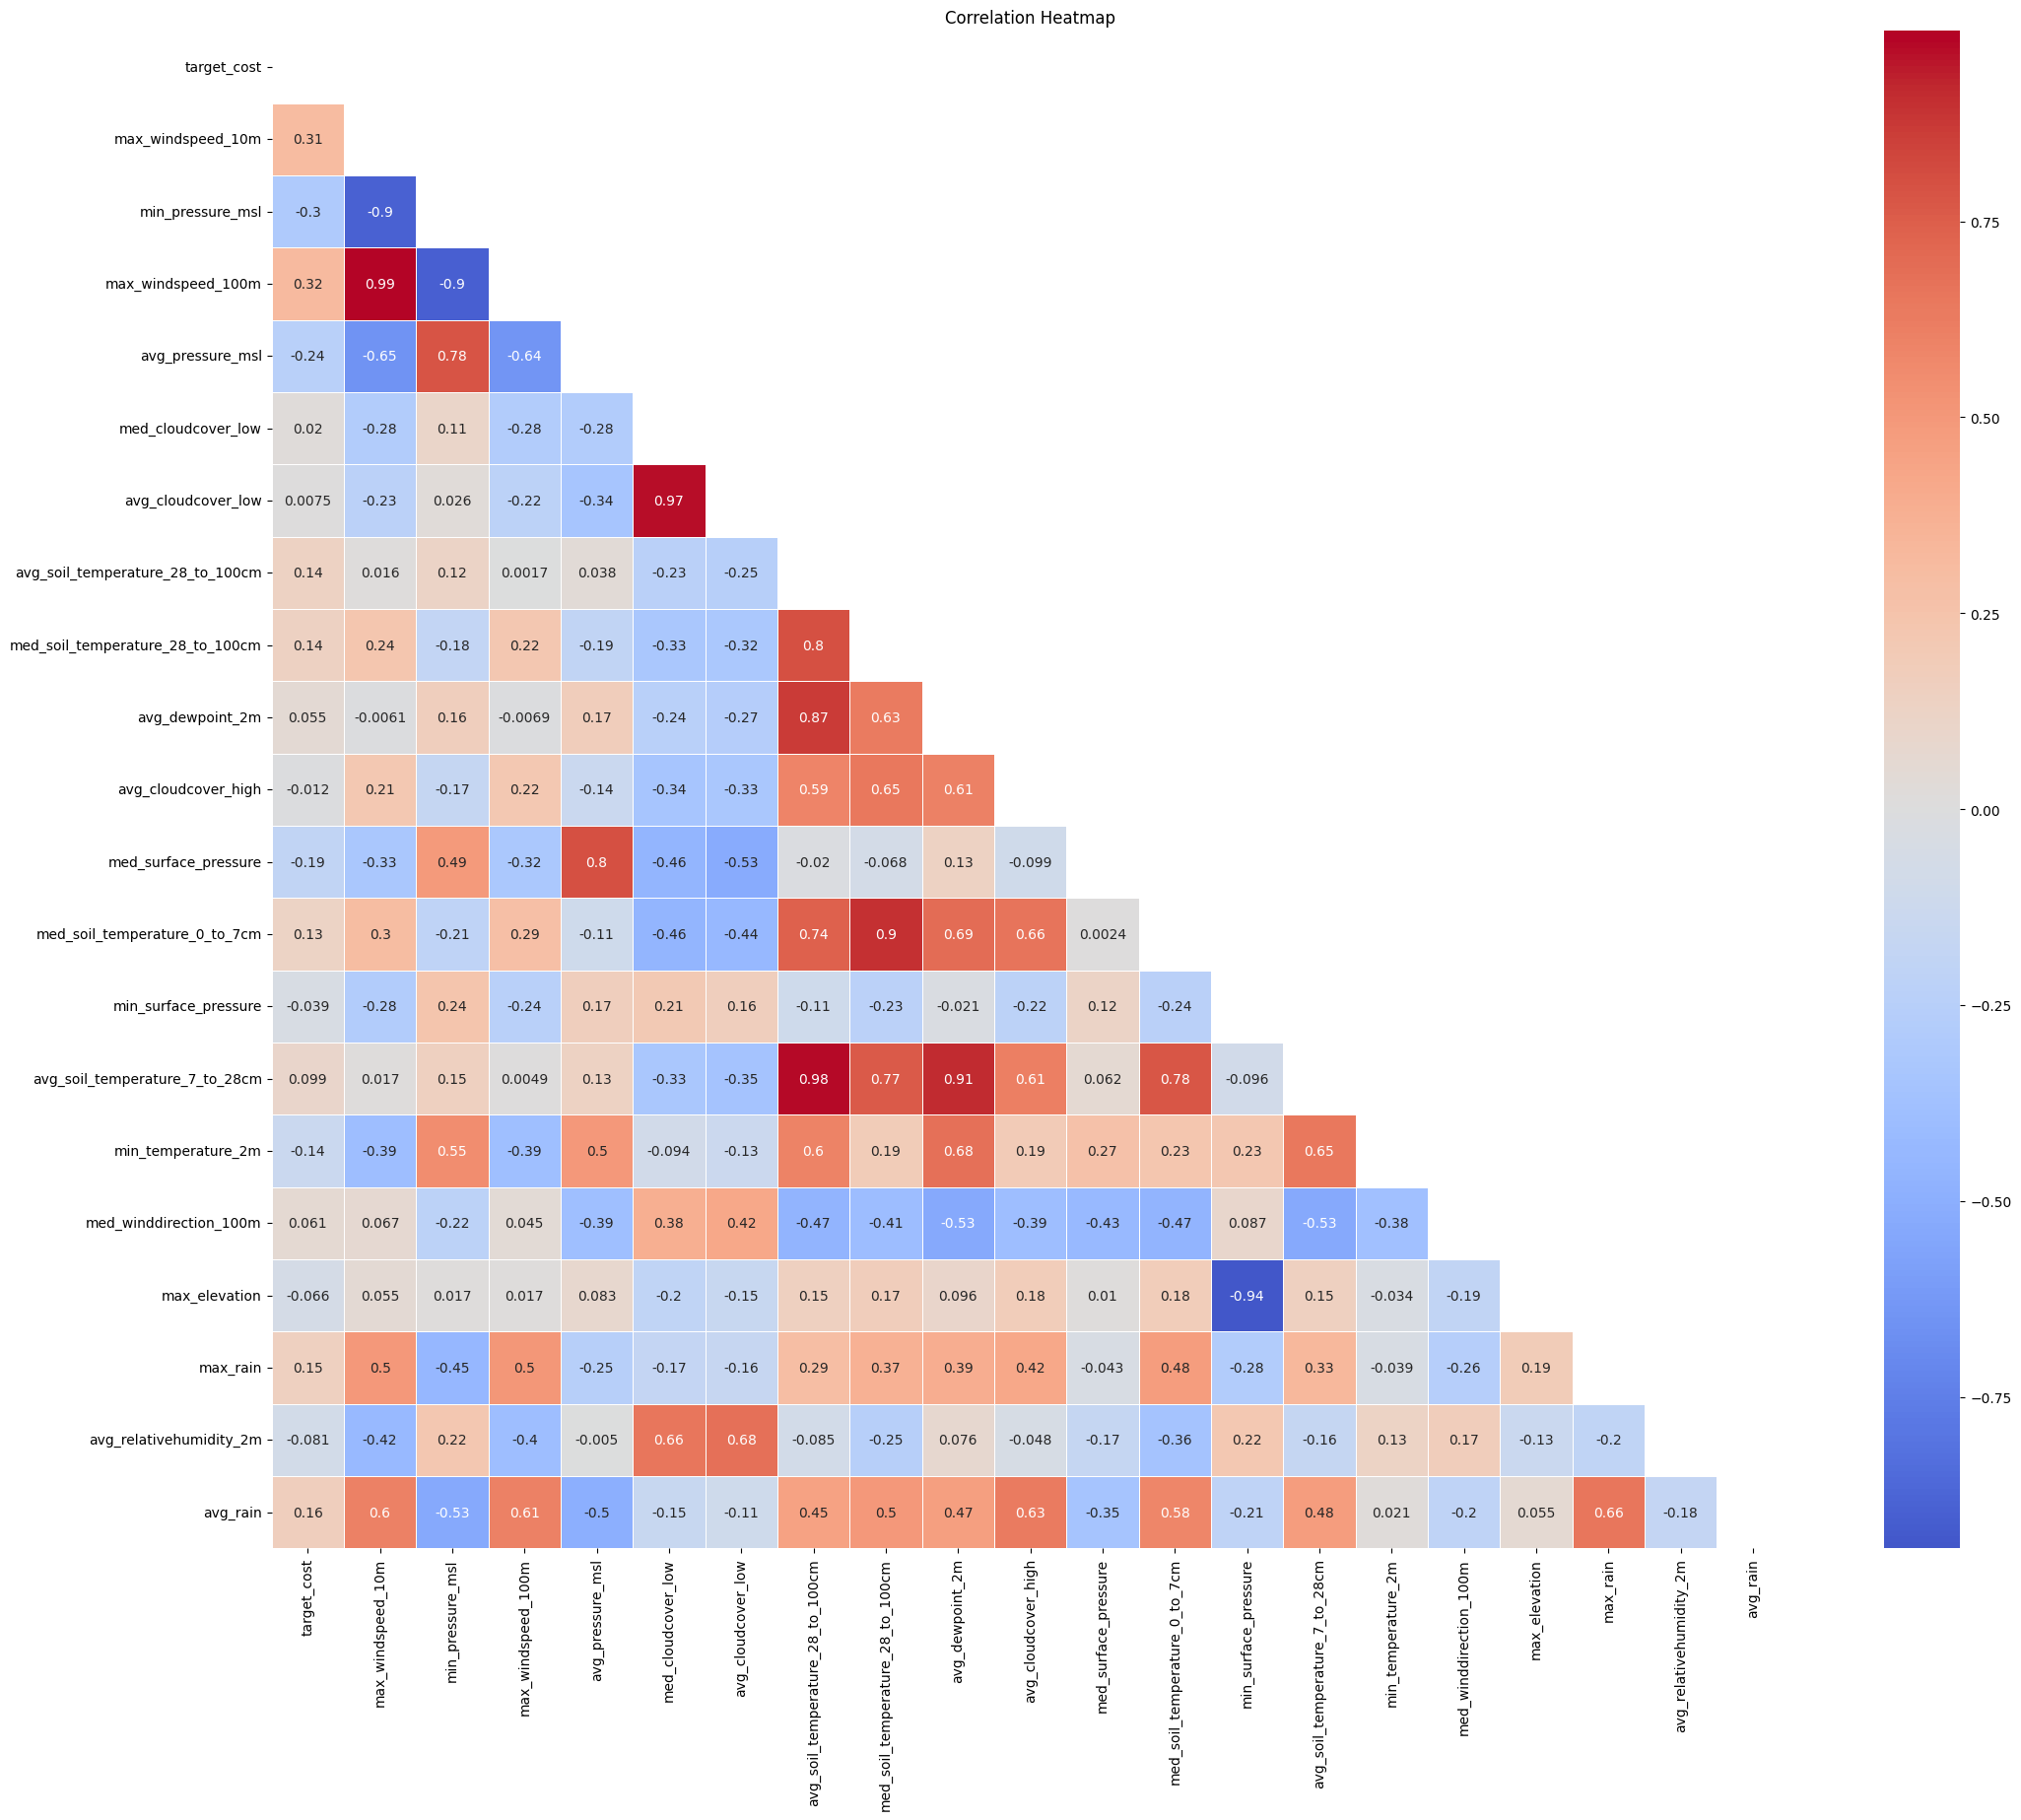

In [122]:
# Calculate the correlation matrix
correlation_matrix = df[feat].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25,20))
# ax.set_facecolor('lightgray')
# Generate a custom diverging colormap

# cmap = sns.diverging_palette(250, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask,  center=0,
            square=True, linewidths=.5, annot=True, cmap="coolwarm")

# plt.grid()

plt.title("Correlation Heatmap")
plt.show()


In [123]:
model_data = df[feat]
model_data.to_csv('model_data.csv')

In [124]:
model_data.shape

(57, 21)